<a href="https://colab.research.google.com/github/feiduobaby/good-first-issue/blob/main/Capstone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import polars as pl
import os
import joblib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!cp -r /content/drive/MyDrive/114239_nfl_competition_files_published_analytics_final /content/

In [38]:
# Paths and constants
input_path = '/content/114239_nfl_competition_files_published_analytics_final/train'
def read_selected_data(input_path):
    # Define the directory containing your data files

    # List three specific Parquet files you want to read
    selected_files = [f"input_2023_w0{i}.csv" for i in range(1,10)]+[f"input_2023_w{i}.csv" for i in range(10,19)]
    # Load and filter the data from only the selected Parquet files
    dfs = []
    for file_name in selected_files:
        file_path = f'{input_path}/{file_name}'
        lazy_df = pl.scan_csv(file_path)
        df = lazy_df.collect()
        dfs.append(df)

    # Concatenate all dataframes into a single dataframe
    full_df = pl.concat(dfs)

    return full_df

In [37]:
def read_output_data(output_path):
    # Define the directory containing your data files

    # List three specific Parquet files you want to read
    selected_files = [f"output_2023_w0{i}.csv" for i in range(1,10)]+[f"output_2023_w{i}.csv" for i in range(10,19)]
    # Load and filter the data from only the selected Parquet files
    dfs = []
    for file_name in selected_files:
        file_path = f'{input_path}/{file_name}'
        lazy_df = pl.scan_csv(file_path)
        df = lazy_df.collect()
        dfs.append(df)

    # Concatenate all dataframes into a single dataframe
    full_df = pl.concat(dfs)

    return full_df

2. Describe Some Data

In [6]:
df=read_selected_data(input_path)
df.head()

game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,player_birth_date,player_position,player_side,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
i64,i64,bool,i64,i64,str,i64,str,str,i64,str,str,str,str,f64,f64,f64,f64,f64,f64,i64,f64,f64
2023090700,101,false,54527,1,"""right""",42,"""Bryan Cook""","""6-1""",210,"""1999-09-07""","""FS""","""Defense""","""Defensive Coverage""",52.33,36.94,0.09,0.39,322.4,238.24,21,63.259998,-0.22
2023090700,101,false,54527,2,"""right""",42,"""Bryan Cook""","""6-1""",210,"""1999-09-07""","""FS""","""Defense""","""Defensive Coverage""",52.33,36.94,0.04,0.61,200.89,236.05,21,63.259998,-0.22
2023090700,101,false,54527,3,"""right""",42,"""Bryan Cook""","""6-1""",210,"""1999-09-07""","""FS""","""Defense""","""Defensive Coverage""",52.33,36.93,0.12,0.73,147.55,240.6,21,63.259998,-0.22
2023090700,101,false,54527,4,"""right""",42,"""Bryan Cook""","""6-1""",210,"""1999-09-07""","""FS""","""Defense""","""Defensive Coverage""",52.35,36.92,0.23,0.81,131.4,244.25,21,63.259998,-0.22
2023090700,101,false,54527,5,"""right""",42,"""Bryan Cook""","""6-1""",210,"""1999-09-07""","""FS""","""Defense""","""Defensive Coverage""",52.37,36.9,0.35,0.82,123.26,244.25,21,63.259998,-0.22


In [7]:
df.select(pl.all().is_null().any())

game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,player_birth_date,player_position,player_side,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool
false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false


In [8]:
df.describe()

statistic,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,player_birth_date,player_position,player_side,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
str,f64,f64,f64,f64,f64,str,f64,str,str,f64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",4.880579e6,4.880579e6,4.880579e6,4.880579e6,4.880579e6,"""4880579""",4.880579e6,"""4880579""","""4880579""",4.880579e6,"""4880579""","""4880579""","""4880579""","""4880579""",4.880579e6,4.880579e6,4.880579e6,4.880579e6,4.880579e6,4.880579e6,4.880579e6,4.880579e6,4.880579e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,"""0""",0.0,"""0""","""0""",0.0,"""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",2.0232e9,2196.408924,0.267067,49558.903219,16.131788,null,60.550452,null,null,211.278286,null,null,null,null,60.500736,26.811895,3.019878,2.118335,180.497185,181.536618,11.64147,60.51581,26.637664
"""std""",201140.46685,1246.426122,null,5210.337609,11.130079,null,23.059354,null,null,22.177471,null,null,null,null,23.489191,10.006199,2.227939,1.415794,100.716153,98.009122,5.331537,25.296428,15.438138
"""min""",2.0231e9,54.0,0.0,30842.0,1.0,"""left""",11.0,"""A'Shawn Robinson""","""5-10""",153.0,"""1984-05-19""","""CB""","""Defense""","""Defensive Coverage""",0.41,0.62,0.0,0.0,0.0,0.0,5.0,-5.26,-3.91
"""25%""",2.0231e9,1150.0,null,45198.0,8.0,null,41.0,null,null,195.0,null,null,null,null,42.63,18.99,1.09,1.01,90.91,91.74,8.0,42.610001,13.3
"""50%""",2.0231e9,2171.0,null,52413.0,15.0,null,61.0,null,null,207.0,null,null,null,null,60.41,26.85,2.72,1.92,179.56,180.14,10.0,60.509998,26.469999
"""75%""",2.0231e9,3246.0,null,54500.0,22.0,null,80.0,null,null,225.0,null,null,null,null,78.23,34.62,4.62,3.04,270.83,271.58,14.0,78.470001,39.869999
"""max""",2.0240e9,5258.0,1.0,56673.0,123.0,"""right""",109.0,"""Zyon McCollum""","""6-9""",358.0,"""2002-10-05""","""WR""","""Offense""","""Targeted Receiver""",119.86,52.88,12.53,17.12,360.0,360.0,94.0,125.849998,57.330002


In [9]:
df.select(
    pl.col("player_to_predict").value_counts(sort=True)
).unnest("player_to_predict")

player_to_predict,count
bool,u32
false,3577139
true,1303440


In [10]:
df.group_by(
    (pl.col("play_id")).alias("play_id"),
    maintain_order=True,
).len()

play_id,len
i64,u32
101,2993
194,1614
219,1333
361,1320
436,1095
…,…
2852,948
920,234
3679,348


3. Generate height-weight heatmap

In [11]:
np.sort(df["player_height"].unique())

array(['5-10', '5-11', '5-6', '5-7', '5-8', '5-9', '6-0', '6-1', '6-2',
       '6-3', '6-4', '6-5', '6-6', '6-7', '6-8', '6-9'], dtype='<U4')

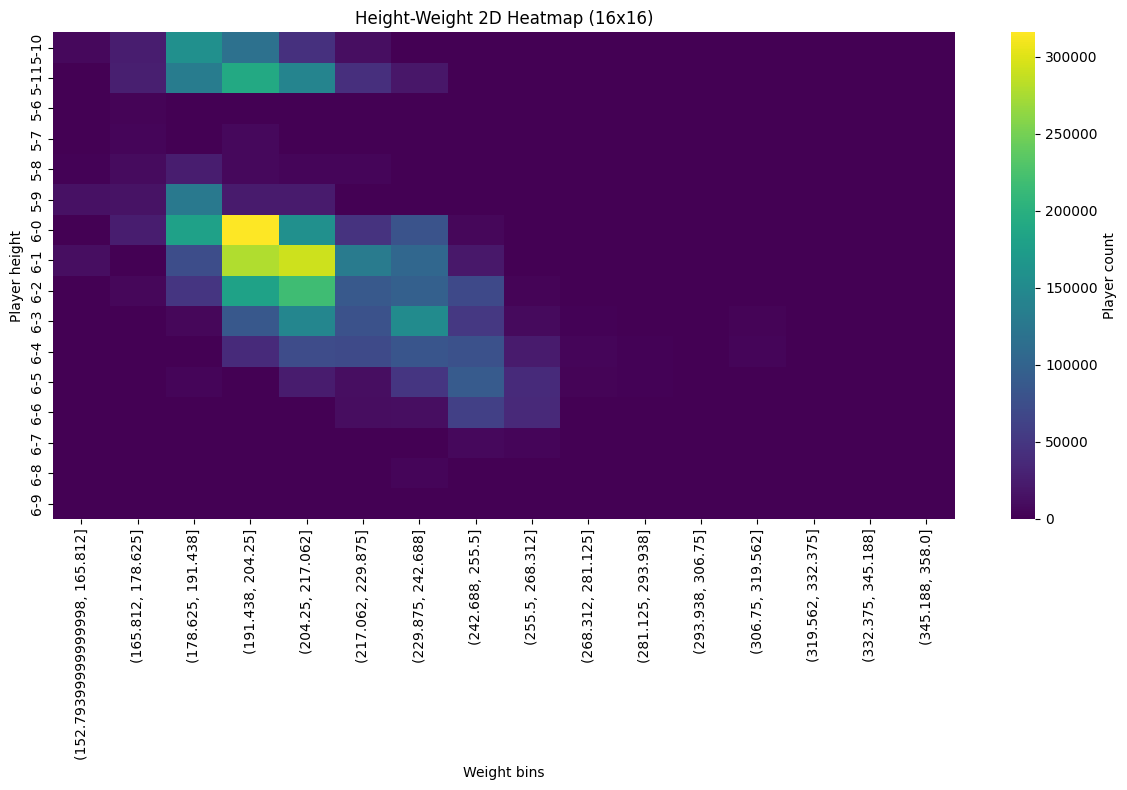

In [12]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df 是你的 polars.DataFrame，包含 player_height, player_weight

# 1) 转成 pandas
pdf = df.to_pandas()

# 2) 体重分 16 等宽区间
pdf["weight_bin"] = pd.cut(
    pdf["player_weight"],
    bins=16,
    include_lowest=True
)

# 3) 生成 16x16 频数表
heat_df = pd.crosstab(
    index=pdf["player_height"],
    columns=pdf["weight_bin"]
)

# 4) 画热力图
plt.figure(figsize=(12, 8))
sns.heatmap(
    heat_df,
    cmap="viridis",
    cbar_kws={"label": "Player count"}
)
plt.xlabel("Weight bins")
plt.ylabel("Player height")
plt.title("Height-Weight 2D Heatmap (16x16)")
plt.tight_layout()
plt.show()

4. Choose specific game_id, frame_id, player_id to generate trajectory

In [13]:
df["game_id"]

game_id
i64
2023090700
2023090700
2023090700
2023090700
2023090700
…
2024010713
2024010713
2024010713


In [14]:
import polars as pl

play_ids = (
    df
    .filter(pl.col("game_id") == 2023090700)
    .select("play_id")
    .unique()
)

print(play_ids)

shape: (58, 1)
┌─────────┐
│ play_id │
│ ---     │
│ i64     │
╞═════════╡
│ 2487    │
│ 3032    │
│ 2141    │
│ 2936    │
│ 1837    │
│ …       │
│ 1812    │
│ 1940    │
│ 877     │
│ 2825    │
│ 1679    │
└─────────┘


In [15]:
nfl_ids_list = (
    df
    .filter(
        (pl.col("game_id") == 2023090700) &
        (pl.col("play_id") == 2510)
    )
    .select("nfl_id")
    .unique()
    .to_series()
    .to_list()
)
print(nfl_ids_list)

[53542, 55910, 53953, 44822, 46309, 54519, 55882, 46243, 54562, 47888, 54716, 44906, 53591]


In [16]:
import polars as pl

track = (
    df
    .filter(
        (pl.col("game_id") == 2023090700) &
        (pl.col("play_id") == 2510) &
        (pl.col("nfl_id") == 53953)
    )
    .sort("frame_id")   # 按时间/帧排序
)

In [17]:
pdf = track.to_pandas()

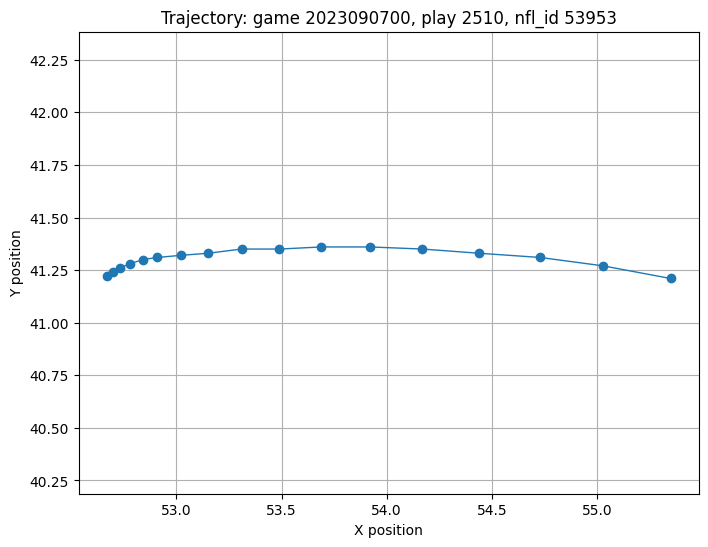

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(
    pdf["x"],
    pdf["y"],
    marker="o",    # 每一帧一个点
    linewidth=1    # 把点连成线
)
plt.xlabel("X position")
plt.ylabel("Y position")
plt.title("Trajectory: game 2023090700, play 2510, nfl_id 53953")
plt.axis("equal")   # 保持比例，不拉伸场地
plt.grid(True)
plt.show()

5. analysis supplementary data

In [20]:
import pandas as pd

df = pd.read_csv("/content/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv")
print(df.head())

      game_id  season  week   game_date game_time_eastern home_team_abbr  \
0  2023090700    2023     1  09/07/2023          20:20:00             KC   
1  2023090700    2023     1  09/07/2023          20:20:00             KC   
2  2023090700    2023     1  09/07/2023          20:20:00             KC   
3  2023090700    2023     1  09/07/2023          20:20:00             KC   
4  2023090700    2023     1  09/07/2023          20:20:00             KC   

  visitor_team_abbr  play_id  \
0               DET     3461   
1               DET      461   
2               DET     1940   
3               DET     1711   
4               DET     1588   

                                    play_description  quarter  ...  \
0  (10:46) (Shotgun) J.Goff pass deep left to J.R...        4  ...   
1  (7:30) J.Goff pass short right to J.Reynolds t...        1  ...   
2  (:09) (Shotgun) J.Goff pass incomplete deep ri...        2  ...   
3  (:45) (No Huddle, Shotgun) P.Mahomes pass deep...        2  ...   


/tmp/ipython-input-449022865.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv")


In [23]:
df.groupby(['down'])['yards_gained'].mean()

,yards_gained
down,
1,8.643885
2,7.685686
3,8.194518
4,6.578411


In [25]:
#definition of if it achieved first attack
def is_success(row):
  if row.down == 1:
    return row.yards_gained >= 0.4 * row.yards_to_go
  elif row.down == 2:
    return row.yards_gained >= 0.6 * row.yards_to_go
  else:
    return row.yards_gained >= row.yards_to_go
df['success'] = df.apply(is_success, axis = 1)

In [26]:
print(df['success'])

0         True
1         True
2        False
3         True
4        False
         ...  
18004    False
18005     True
18006    False
18007    False
18008     True
Name: success, Length: 18009, dtype: bool


/tmp/ipython-input-2165727440.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(


<Axes: xlabel='dropback_bucket', ylabel='down'>

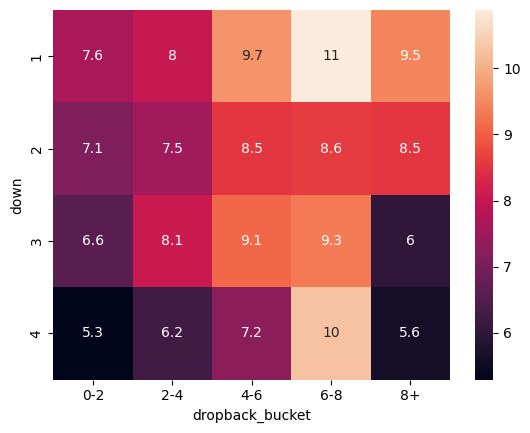

In [31]:
import pandas as pd
import seaborn as sns
#use the category of dropback distance and down to see the heatmap
df['dropback_bucket'] = pd.cut(
    df['dropback_distance'],
    bins=[-1, 2, 4, 6, 8, 20],
    labels=['0-2','2-4','4-6','6-8','8+']
)

pivot = pd.pivot_table(
    df,
    index='down',
    columns='dropback_bucket',
    values='yards_gained',
    aggfunc='mean'
)

sns.heatmap(pivot, annot=True)

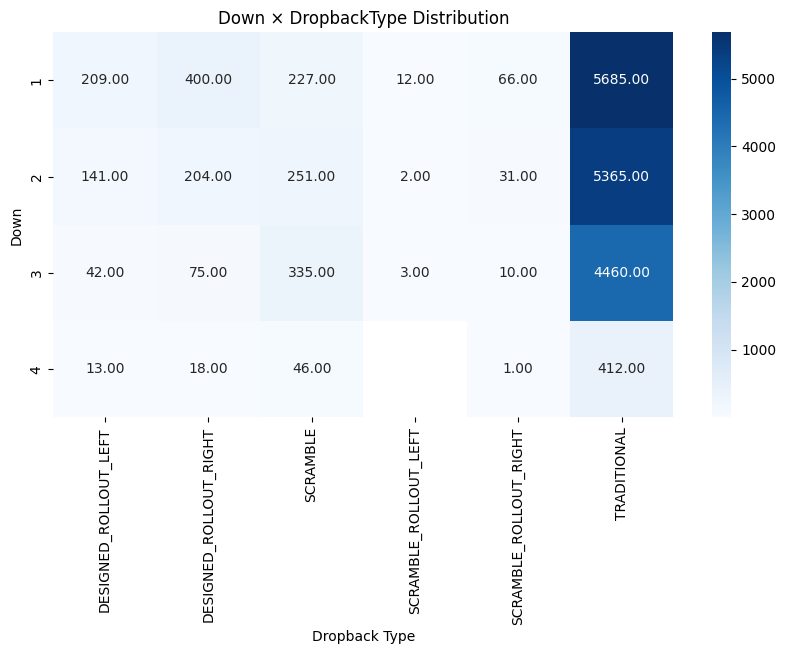

In [35]:
#The relation between dropbacktype and down
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pivot = pd.pivot_table(
    df,
    index='down',
    columns='dropback_type',
    values='play_id',
    aggfunc='count'
)

plt.figure(figsize=(10,5))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="Blues")
plt.title("Down × DropbackType Distribution")
plt.ylabel("Down")
plt.xlabel("Dropback Type")
plt.show()

In [ ]:
# -----------------------------
# 1️⃣ Load Data
# -----------------------------
in_df = read_selected_data(input_path)
out_df = read_output_data(input_path)
supplementary = pd.read_csv("/content/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv")

# Merge features and labels
data = in_df.join(out_df, on = "game_id", how="inner")

print("Dataset shape:", data.shape)
print("Columns:", data.columns)

# -----------------------------
# 2️⃣ Check missing values
# -----------------------------
missing = data.null_count()
print("Missing values per column:")
print(missing)

# -----------------------------
# 3️⃣ Categorical features distribution
# -----------------------------
cat_features = ['dropbackType', 'passLocationType']  # 根据 Supplementary_data.csv 确定
for col in cat_features:
    df_count = data.groupby(col).count().to_pandas()
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y="count", data=df_count)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()

# -----------------------------
# 4️⃣ Numerical features distribution
# -----------------------------
num_features = ['dropbackDistance']  # 可以根据 Supplementary_data.csv 添加其他数值特征
num_df = data.select(num_features).to_pandas()
num_df.hist(bins=30, figsize=(10,4))
plt.suptitle("Numerical Features Distribution")
plt.show()

# -----------------------------
# 5️⃣ Categorical feature vs label (heatmap)
# -----------------------------
label_col = out_df.columns[0]  # 假设第一个输出列是 yardsGained

# pivot table: dropbackType x passLocationType
pivot_df = (
    data.groupby(['dropbackType', 'passLocationType'])
        .agg(pl.mean(label_col).alias('avg_yards'))
        .to_pandas()
        .pivot(index='dropbackType', columns='passLocationType', values='avg_yards')
)

plt.figure(figsize=(8,5))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("DropbackType × PassLocationType vs Avg YardsGained")
plt.show()

# -----------------------------
# 6️⃣ Numerical feature vs label (scatter)
# -----------------------------
scatter_df = data.select(['dropbackDistance', label_col]).to_pandas()
plt.figure(figsize=(7,5))
sns.scatterplot(x='dropbackDistance', y=label_col, data=scatter_df, alpha=0.3)
plt.title("DropbackDistance vs YardsGained")
plt.show()

# -----------------------------
# 7️⃣ Cross analysis / correlations
# -----------------------------
corr_df = data.select(num_features + [label_col]).to_pandas()
corr_matrix = corr_df.corr()
print("Correlation matrix:")
print(corr_matrix)

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Numerical Features Correlation with YardsGained")
plt.show()

# -----------------------------
# 8️⃣ Label distribution
# -----------------------------
label_pd = data.select(label_col).to_pandas()
plt.figure(figsize=(6,4))
sns.histplot(label_pd[label_col], bins=30, kde=True)
plt.title(f"{label_col} Distribution")
plt.show()

# -----------------------------
# 9️⃣ Cross-tab / count table
# -----------------------------
cross_tab = data.groupby(['dropbackType', 'passLocationType']).count().to_pandas()
print("DropbackType x PassLocationType count table:")
print(cross_tab[['dropbackType','passLocationType','count']])

/tmp/ipython-input-1114746947.py:6: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  supplementary = pd.read_csv("/content/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv")
